#### Note: This notebook has the same LSTM architecture as in the 'itr2_LSTM' notebook, but the data has been upsampled to improve performance.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [4]:
# The following cell utiltizes sklearn's API in order to resample (in this case, upsample the dataset)

from sklearn.utils import resample
df_1=train[train[187]==1]
df_2=train[train[187]==2]
df_3=train[train[187]==3]
df_4=train[train[187]==4]
df_0=(train[train[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [5]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train[187]).astype(int)
y_test = to_categorical(test[187]).astype(int)

In [6]:
y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [7]:
train.shape

(100000, 188)

In [8]:
X_train = train.iloc[:,:187].values
X_test = test.iloc[:,:187].values

In [9]:
X_train

array([[0.1627907 , 0.54069769, 0.75581396, ..., 0.        , 0.        ,
        0.        ],
       [0.99006623, 0.93874174, 0.34437087, ..., 0.        , 0.        ,
        0.        ],
       [0.97423887, 0.93208432, 0.59016395, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79393941, 0.69090909, 0.57727271, ..., 0.        , 0.        ,
        0.        ],
       [0.97739506, 0.93864369, 0.88912809, ..., 0.        , 0.        ,
        0.        ],
       [0.87138265, 0.6141479 , 0.55305469, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
X_train.shape

(100000, 187)

In [12]:
X_train = np.reshape(X_train, (100000, 187, 1))

In [13]:
X_train.shape

(100000, 187, 1)

In [14]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

in_nn = Input(shape=(X_train.shape[1],X_train.shape[2]), name='in_nn')

lstm1 = LSTM(units=128, name='lstm1', return_sequences = True)(in_nn)   #(takes in for shape (batch_size, size1, size2))
lstm2 = LSTM(units=64, name='lstm2', return_sequences = True)(lstm1)
lstm3 = LSTM(units=64, name='lstm3', return_sequences = True)(lstm2)
flatten = Flatten()(lstm3)
dense1 = Dense(units=64, activation='relu', name='dense1')(flatten)
dense2 = Dense(units=32, activation='relu', name='dense2')(dense1)
dense3 = Dense(units=5, activation='softmax', name='dense3')(flatten)

model = Model(inputs=in_nn, outputs=dense3)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_nn (InputLayer)          [(None, 187, 1)]          0         
                                                                 
 lstm1 (LSTM)                (None, 187, 128)          66560     
                                                                 
 lstm2 (LSTM)                (None, 187, 64)           49408     
                                                                 
 lstm3 (LSTM)                (None, 187, 64)           33024     
                                                                 
 flatten (Flatten)           (None, 11968)             0         
                                                                 
 dense3 (Dense)              (None, 5)                 59845     
                                                                 
Total params: 208,837
Trainable params: 208,837
Non-trainable

In [16]:
history = model.fit(X_train, y_train, epochs=25, batch_size=16)

Epoch 1/25
6250/6250 [==============================] - 149s 22ms/step - loss: 0.3690 - accuracy: 0.8694
Epoch 2/25
6250/6250 [==============================] - 138s 22ms/step - loss: 0.1745 - accuracy: 0.9396
Epoch 3/25
6250/6250 [==============================] - 140s 22ms/step - loss: 0.1205 - accuracy: 0.9590
Epoch 4/25
6250/6250 [==============================] - 140s 22ms/step - loss: 0.0923 - accuracy: 0.9692
Epoch 5/25
6250/6250 [==============================] - 137s 22ms/step - loss: 0.0740 - accuracy: 0.9751
Epoch 6/25
6250/6250 [==============================] - 139s 22ms/step - loss: 0.0603 - accuracy: 0.9800
Epoch 7/25
6250/6250 [==============================] - 144s 23ms/step - loss: 0.0522 - accuracy: 0.9824
Epoch 8/25
6250/6250 [==============================] - 164s 26ms/step - loss: 0.0456 - accuracy: 0.9851
Epoch 9/25
6250/6250 [==============================] - 157s 25ms/step - loss: 0.0407 - accuracy: 0.9869
Epoch 10/25
6250/6250 [==============================] 

In [17]:
history.history

{'loss': [0.3689814805984497,
  0.17448139190673828,
  0.12046542018651962,
  0.09228521585464478,
  0.07398442178964615,
  0.06029964238405228,
  0.05221531167626381,
  0.04555352032184601,
  0.040683649480342865,
  0.035317014902830124,
  0.030976220965385437,
  0.027820954099297523,
  0.025998825207352638,
  0.024759646505117416,
  0.022234421223402023,
  0.019400278106331825,
  0.018009454011917114,
  0.017321696504950523,
  0.01551206037402153,
  0.014655111357569695,
  0.01424191053956747,
  0.014179560355842113,
  0.013033084571361542,
  0.0116617102175951,
  0.011155077256262302],
 'accuracy': [0.8693900108337402,
  0.9396399855613708,
  0.9590299725532532,
  0.9691600203514099,
  0.9751499891281128,
  0.9799900054931641,
  0.9823799729347229,
  0.9851099848747253,
  0.9869300127029419,
  0.9884399771690369,
  0.9897500276565552,
  0.9909800291061401,
  0.9917100071907043,
  0.992169976234436,
  0.9926000237464905,
  0.993619978427887,
  0.994159996509552,
  0.9945399761199951,

In [18]:
# Evaluate on the test data
results = model.evaluate(X_test, y_test, batch_size=16)

1369/1369 [==============================] - 37s 26ms/step - loss: 0.1745 - accuracy: 0.9745


In [19]:
print("test loss, test acc:", results)

test loss, test acc: [0.17452318966388702, 0.9745112657546997]


In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([[1.0000000e+00, 1.4294018e-11, 2.1147311e-12, 7.3176955e-15,
        1.7227637e-23],
       [9.9999464e-01, 1.2669416e-10, 5.3352237e-06, 1.6996398e-16,
        9.4588526e-10],
       [1.0000000e+00, 4.0392489e-08, 1.2867510e-16, 8.8324369e-18,
        5.3333438e-27],
       ...,
       [4.2700665e-07, 6.5618487e-12, 3.3989147e-09, 1.5323050e-14,
        9.9999952e-01],
       [1.5642794e-16, 1.5403101e-23, 4.0863557e-23, 1.1010932e-27,
        1.0000000e+00],
       [1.4233459e-26, 1.3288480e-24, 3.1030210e-18, 5.9039119e-31,
        1.0000000e+00]], dtype=float32)

Normalized confusion matrix


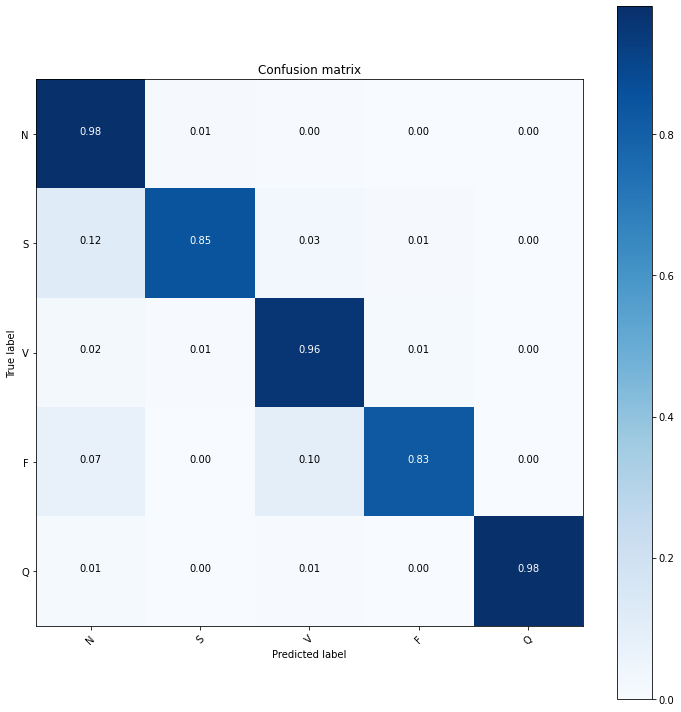

In [23]:
# The following function plots the confusion matrix. Can toggle normalization.

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix')
plt.show()